Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
#  release an unreferenced memory 

import gc
gc.collect()

35

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [3]:
#read in pickle file

ords_prods_merge = pd.read_pickle(r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets\Prepared data\orders_products_merge_comined_2.pkl')

In [4]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_flag,first_name,surname,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Text(0.5, 1.0, 'Number of orders by hour')

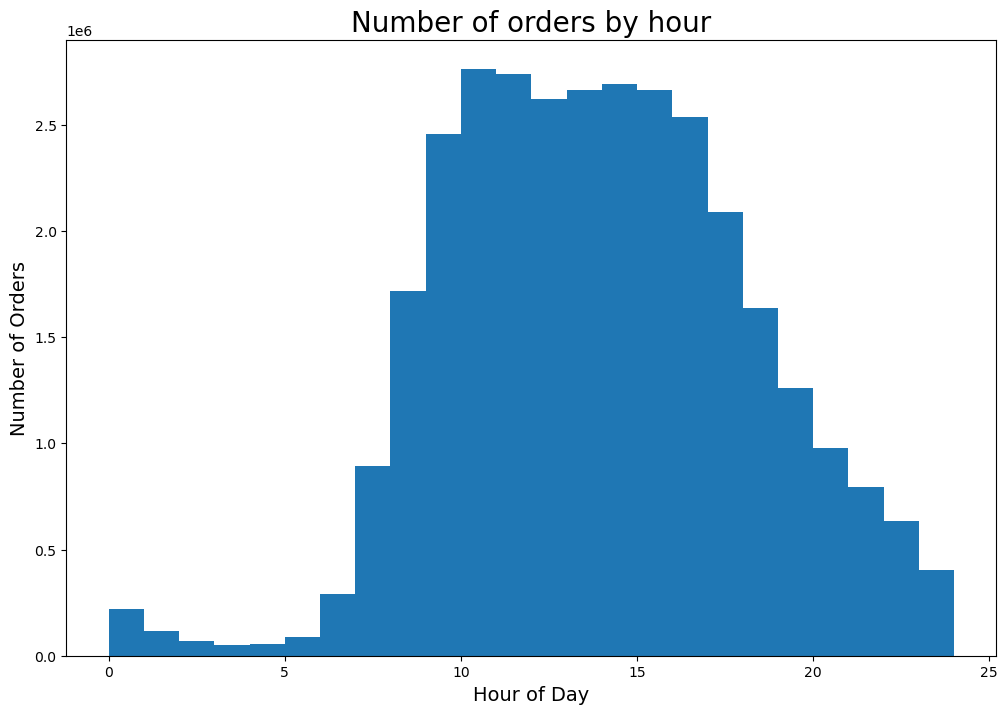

In [17]:
#Create histogram chart

hist = ords_prods_merge['order_hour_of_day'].plot.hist(figsize=(12,8), bins=24, range=[0,24])
hist.set_ylabel("Number of Orders",fontsize=14)
hist.set_xlabel("Hour of Day",fontsize=14)
hist.set_title("Number of orders by hour",fontsize=20,color='black')

In [18]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [19]:
# export histogram chart outside of Jupyter in the form of an image file

hist.figure.savefig(os.path.join(path_new, 'Prepared data', 'hist_hrs_days_ords.png'))

In [20]:
ords_prods_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'loyalty_flag_price', 'order_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'num_dependants',
       'fam_status', 'income'],
      dtype='object')

In the histogram above we see that the highest orders come in at 10 am but from 10 am through 16/(4) pm.  The lowest orders come in at 3 am and between the hours  of 12 am through 6 am very few orders are placed. The order flow can be broken down into two groups: 8am to 17pm (group 1) and 17pm to 8am (group 2) there would be two overlap hours at 17pm and 8am which would align with the working hours of most supermarkets day shifts and overnight shifts. 

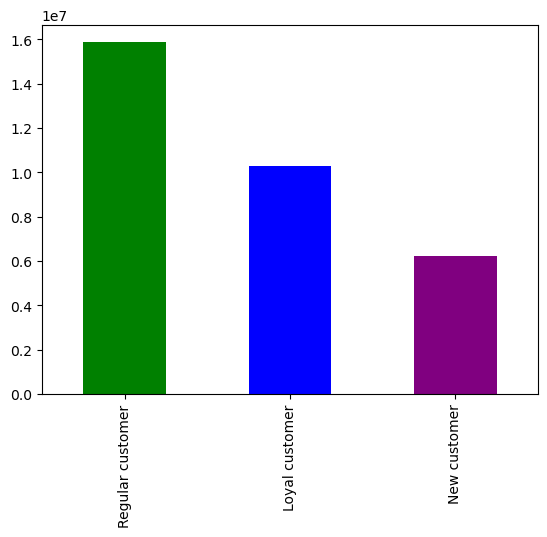

In [21]:
#Create a color bar chart
bar = ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color=['green', 'blue', 'purple'])

In [22]:
# export bar chart outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path_new, 'Prepared data', 'bar_loyalty_flag.png'))

In [23]:
#create a subset for a line chart

df = ords_prods_merge[:200000]

In [24]:
#splitting df into 70/30 subsets

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
# create a list to hold true/false values to test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
#store 70% sample in big df

big = ords_prods_merge[dev]

In [27]:
#store 30% sample in small df

small = ords_prods_merge[~dev]

In [28]:
#create small df with only needed columns

df_2 = small[['order_hour_of_day','prices']]

In [29]:
#create big df with only needed columns

df_3 = big[['order_hour_of_day','prices']]

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

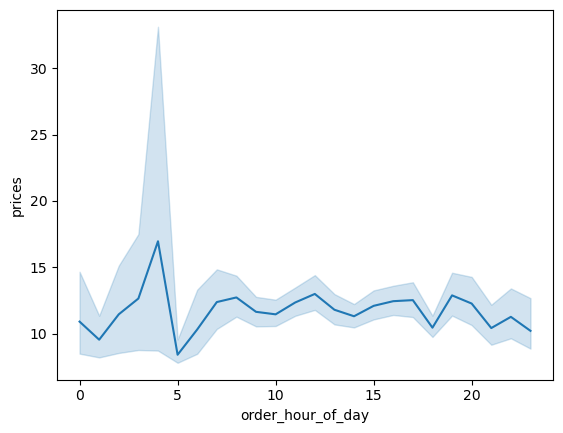

In [31]:
#create a line chart
line = sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')

In [32]:
# export line chart outside of Jupyter in the form of an image file

line.figure.savefig(os.path.join(path_new, 'Prepared data', 'line_order_by_hr.png'))

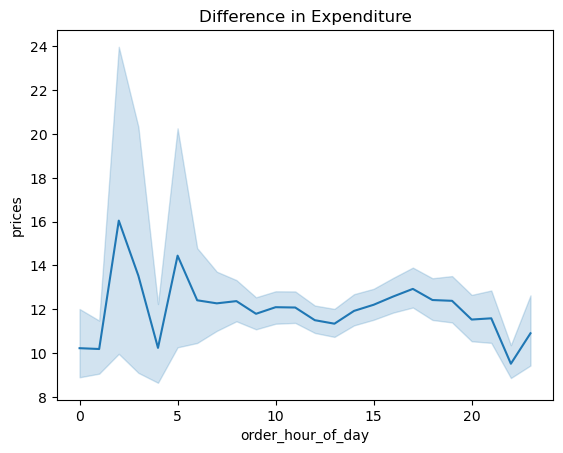

In [33]:
#Create line chart

line_2 = sns.lineplot(data=df_3, x='order_hour_of_day', y='prices').set_title('Difference in Expenditure')

In [34]:
# export line_big chart outside of Jupyter in the form of an image file

line_2.figure.savefig(os.path.join(path_new, 'Prepared data', 'line_big_order_by_hr.png'))

I have added a title to the chart.  The output shows that during the peak prices are from hours starting at 1am there is a sharp lowering prices at 5am.  Between 10 and 8pm the prices starts to èlevate.  Conversely from 11 am to 23pm the prices start to tapper down.  

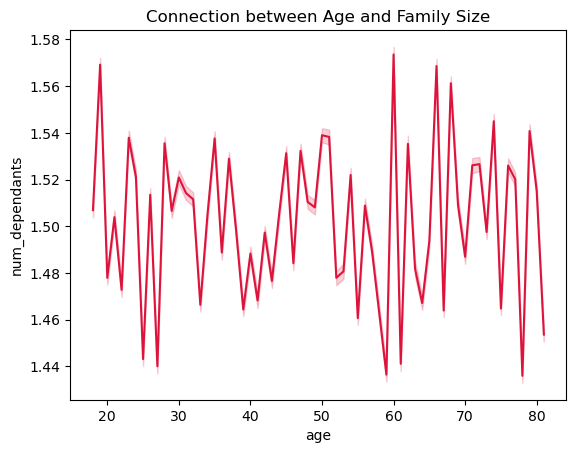

In [35]:
#Create line chart

line_3 = sns.lineplot(data=ords_prods_merge, x='age', y='num_dependants', color='crimson').set_title('Connection between Age and Family Size')

In [36]:
# expor line chart outside of Jupyter in the form of an image file

line_3.figure.savefig(os.path.join(path_new, 'Prepared data', 'age_num_dep.png'))

Based on the line chart there does not seem to be a direct correlation between age and number of dependents.  There does seem to be four groups of dependents (0, 1, 2, 3).  There does not seems to be any dependents over three. While using seaborn gives a more visualed chart there no such thing as a 1.5 person. 

In [37]:
#Check for max - income

ords_prods_merge['income'].max()

593901

In [38]:
#Check for max - age

ords_prods_merge['age'].max()

81

In [39]:
#Check for min - age

ords_prods_merge['age'].min()

18

In [40]:
 #Check for median - age

ords_prods_merge['income'].median()

96618.0

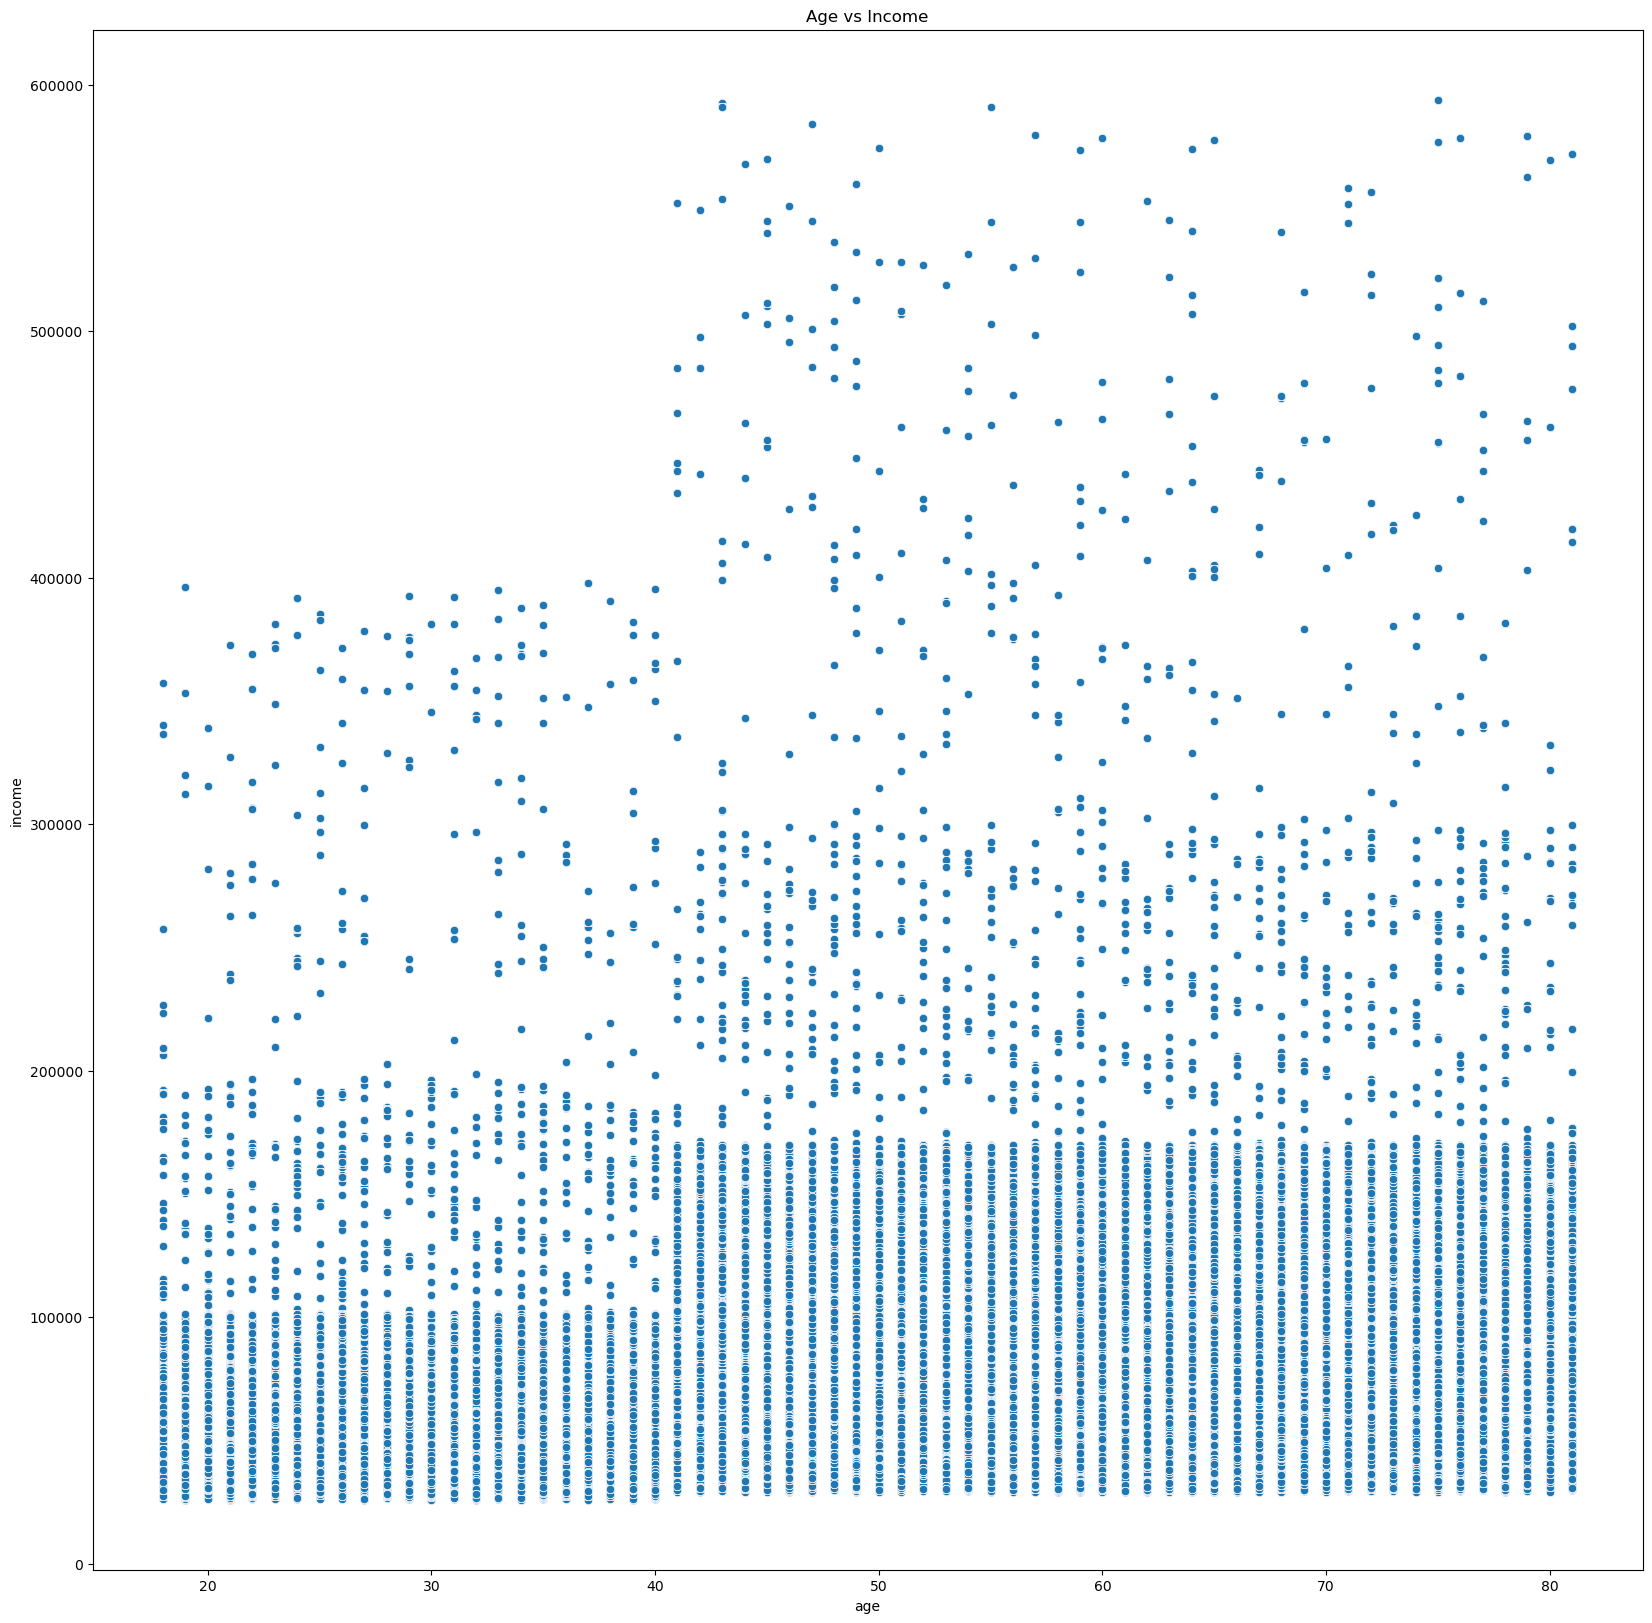

In [41]:
# Create a scatterplot

plt.figure(figsize=(20,20))
scatter = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_merge).set_title('Age vs Income')

In [42]:
# expor scatter chart outside of Jupyter in the form of an image file

scatter.figure.savefig(os.path.join(path_new, 'Prepared data', 'age_vs_income.png'))

Based on the scatter chart there seems to be an even distribution across all age groups.  The max age is 81.  I would recommend rerunning the results dropping under 20 as anage group. Generally the age of consent is 18 and most person in this age group would fall under dependant.    Age groups above 40 there is an significant up tick in income.  Regardless of age the highest income range seems to from 0 to 200K with a median income of 93K.  

In [43]:
# Export data to pkl

ords_prods_merge.to_pickle(os.path.join(path_new, 'Prepared data', 'orders_products_merge_comined_2.pkl'))